#                                         MASTER THESIS 


In [3]:
### Requiring necessary packages 



require(ggplot2)
require(GGally)
require(MASS)
require(ggfortify)
require(ggdendro)
#melting
require(reshape)
require(reshape2)
require(gridExtra)
#significance on ggplot 
require(ggsignif)
#for rlm results 
require(sfsmisc)
#TEX on plot
require(latex2exp)



### Insert the current pathway 


Loading required package: ggplot2
Loading required package: GGally
Loading required package: MASS
Loading required package: ggfortify
Loading required package: ggdendro
Loading required package: reshape
Loading required package: reshape2

Attaching package: 'reshape2'

The following objects are masked from 'package:reshape':

    colsplit, melt, recast

Loading required package: gridExtra
Loading required package: ggsignif
Loading required package: sfsmisc
Loading required package: latex2exp


In [4]:
setwd("C:\\users\\toto\\Dropbox\\olga\\times series analysis")

In [5]:
tsm<-read.table('Motivationseries.csv', sep = ',', header = T)
tsp<-read.table('Practiceseries.csv', sep = ',', header = T)
tsm 
tsp


SubjectNumber,Sex,Age,Group,Day1,Day2,Day3,Day4,Day5,Day6,...,Day242,Day243,Day244,Day245,Day246,Day247,Day248,Day249,Day250,Day251
1,M,77,English,NaN,3,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,79,English,3,NaN,2,NaN,2,2,...,3,3,3,3,3,3,NaN,3,3,3
5,F,69,Meditation,3,3,3,NaN,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F,66,Meditation,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,3,3,2,2,3,3
8,M,69,Meditation,NaN,3,3,3,3,3,...,2,3,3,2,3,3,3,2,2,NaN
9,F,65,English,4,3,3,2,3,2,...,1,2,2,2,4,2,2,2,1,2
11,M,83,English,3,3,3,3,3,3,...,2,2,2,3,4,2,2,1,NaN,2
14,F,78,English,4,3,NaN,NaN,3,3,...,2,3,3,3,3,4,3,2,4,3
15,M,71,Meditation,NaN,2,2,2,2,1,...,2,1,2,1,2,1,1,1,2,2
16,M,69,Meditation,2,0,NaN,0,2,3,...,1,3,3,2,2,2,1,2,1,2


SubjectNumber,Sex,Age,Group,Day1,Day2,Day3,Day4,Day5,Day6,...,Day242,Day243,Day244,Day245,Day246,Day247,Day248,Day249,Day250,Day251
1,M,77,English,NaN,2,3,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,79,English,7,NaN,3,NaN,4,4,...,0,0,0,0,6,0,NaN,0,0,0
5,F,69,Meditation,NaN,4,3,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F,66,Meditation,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,2,0,2,3,2,0,0
8,M,69,Meditation,NaN,3,2,2,3,3,...,0,0,4,0,2,0,1,0,0,NaN
9,F,65,English,6,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0
11,M,83,English,6,1,2,2,2,2,...,0,0,0,0,0,0,0,0,NaN,1
14,F,78,English,1,1,NaN,NaN,NaN,2,...,0,1,2,1,0,2,2,0,2,2
15,M,71,Meditation,NaN,2,1,2,1,1,...,2,1,5,2,1,1,2,3,2,4
16,M,69,Meditation,6,0,NaN,0,5,3,...,0,0,0,0,0,0,0,0,0,0


## ggparing to see the data set 

In [6]:
# ggpairs(baseline[,c(4:12)], title = 'Generalized pair plot of DVs and stress questionnaires', mapping=aes(color=Group, alpha=0.5),
#         upper = list(continuous = wrap("cor", size=3,alpha=0.5), combo = "box"),
#         lower = list(continuous = wrap("smooth", alpha = 0.3), combo = wrap("dot", alpha = 0.4)), legend = c(5,1)) +theme(legend.position = 'bottom')
# ggpairs(baseline[,c(4:8, 34:42)], title = 'Generalized pair plot of DVs and MRI signal activation', mapping=aes(color=Group, alpha=0.5),
#         upper = list(continuous = wrap("cor", size=3,alpha = 0.5), combo = "box"),
#         lower = list(continuous = wrap("smooth", alpha = 0.3), combo = wrap("dot", alpha = 0.4)), legend = c(5,1)) +theme(legend.position = 'bottom')
# ggcorr(baseline[, c(4:12, 34:42)], label = T, label_alpha = T)+ labs(title = 'correlation matrix')

# warning=FALSE

# Datasets for daily data: Motivation and practice time for 251 days, N=29

## Formatting the datasets 

### Melting the datasets: keeping the first 4 columns+ renaming the columns to score and day

In [7]:
tspmerg<-melt(data=tsp, id.vars = 1:4)
tsmerg<-melt(data=tsm, id.vars = 1:4)
colnames(tsmerg)[5:6]<-c('Day', 'score')
colnames(tspmerg)[5:6]<-c('Day', 'score')
tsmerg$Day<-as.numeric(substring(as.character(tsmerg$Day), 4))
tspmerg$Day<-as.numeric(substring(as.character(tspmerg$Day), 4))
#if want to View them remove the hashtag
#tspmerg
#tsmerg

In [8]:
#if want to View them remove the hashtag
tspmerg
tsmerg

SubjectNumber,Sex,Age,Group,Day,score
1,M,77,English,1,NaN
2,M,79,English,1,7
5,F,69,Meditation,1,NaN
6,F,66,Meditation,1,NaN
8,M,69,Meditation,1,NaN
9,F,65,English,1,6
11,M,83,English,1,6
14,F,78,English,1,1
15,M,71,Meditation,1,NaN
16,M,69,Meditation,1,6


SubjectNumber,Sex,Age,Group,Day,score
1,M,77,English,1,NaN
2,M,79,English,1,3
5,F,69,Meditation,1,3
6,F,66,Meditation,1,NaN
8,M,69,Meditation,1,NaN
9,F,65,English,1,4
11,M,83,English,1,3
14,F,78,English,1,4
15,M,71,Meditation,1,NaN
16,M,69,Meditation,1,2


#### Subject numbers in to factors:
for graphing purposes we need factors and not continous numbering (for the color code)

In [9]:
tsmerg$SubjectNumber<-as.factor(tsmerg$SubjectNumber)
tspmerg$SubjectNumber<-as.factor(tspmerg$SubjectNumber)

In [10]:
str(tsmerg)

'data.frame':	7530 obs. of  6 variables:
 $ SubjectNumber: Factor w/ 30 levels "1","2","5","6",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Sex          : Factor w/ 3 levels "","F","M": 3 3 2 2 3 2 3 2 3 3 ...
 $ Age          : num  77 79 69 66 69 65 83 78 71 69 ...
 $ Group        : Factor w/ 2 levels "English","Meditation": 1 1 2 2 2 1 1 1 2 2 ...
 $ Day          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ score        : num  NaN 3 3 NaN NaN 4 3 4 NaN 2 ...


So a general reminder: since we have lots of NAs in the dataset, **we couldnt analyse the data with time series**


# Motivation plots (not used in the end for the masters)

## A general time series plot for all of the participants 

### For all of the participants 

group=1 in the geom_line> so that geom-line doesnt give error "each group containing only one observation"

This way it does it plots anyways

In [ ]:

ggplot(tsmerg, aes(Day,score, color=SubjectNumber)) + geom_line(group=1)


This gives a very dense graph thus we need to plot for only a few participants thus to have a better view over the data

## A general overview for the first 10 participants 

**Learn**: Day and Score were factprs thus geom_smooth was not showing on the plot. thus I changed it to as.numeric in the general data frame formatting code chunk

Warning message:
"Removed 1 rows containing missing values (geom_path)."

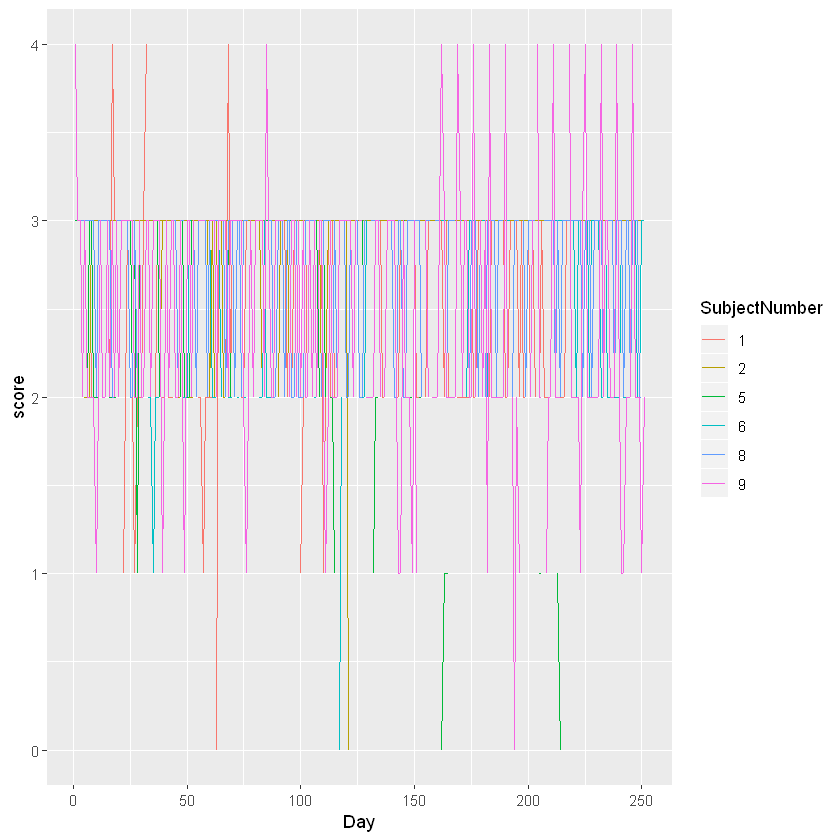

In [12]:
ggplot(tsmerg[tsmerg$SubjectNumber %in% 1:10,], aes(Day,score, color=SubjectNumber)) + geom_line(group = 1)


## with smooth lines

Warning message:
"Removed 482 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

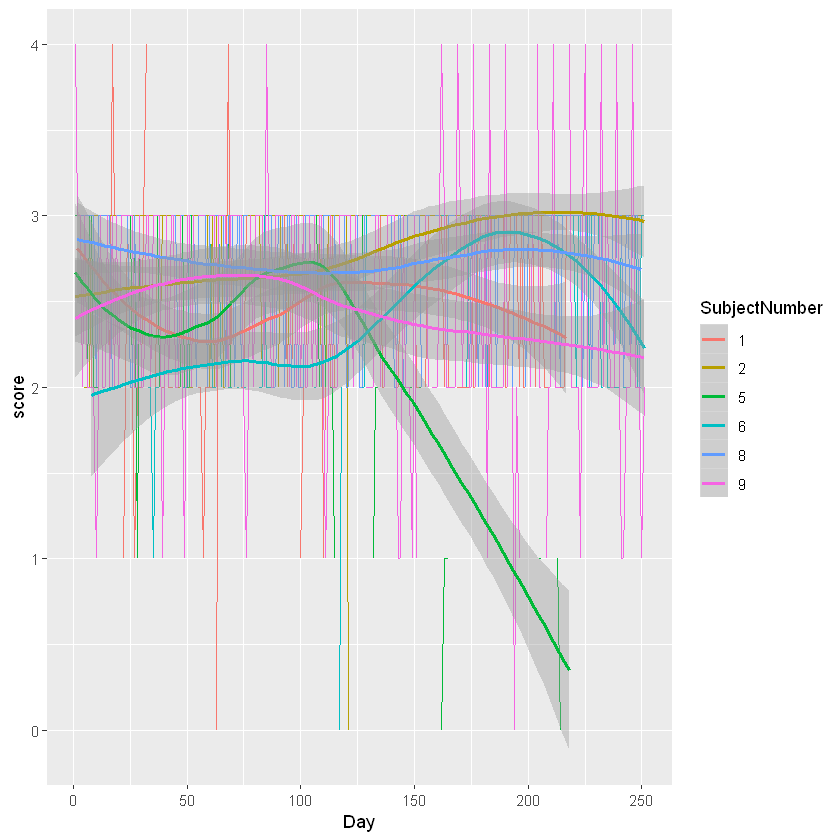

In [13]:
ggplot(tsmerg[tsmerg$SubjectNumber %in% 1:10,], aes(Day,score, color=SubjectNumber)) + geom_line(group=1)+ geom_smooth(method='loess')


## Only smooth lines for both groups and all of the participants

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1810 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1810 rows containing non-finite values (stat_smooth)."

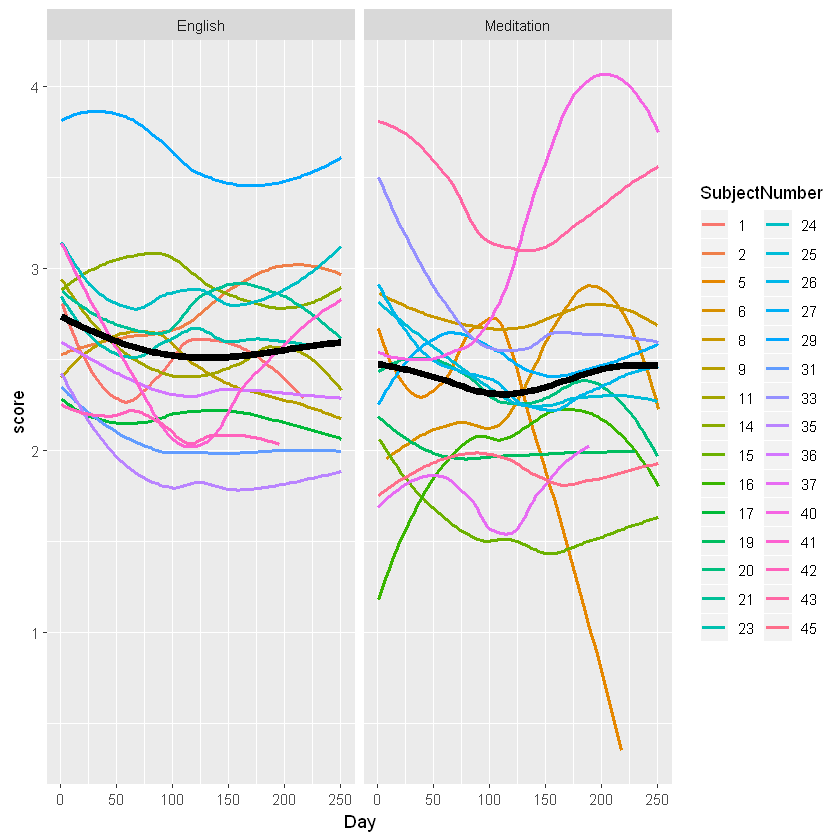

In [14]:
ggplot(tsmerg[tsmerg$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))


# Practice time plots: for all of the participants 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."

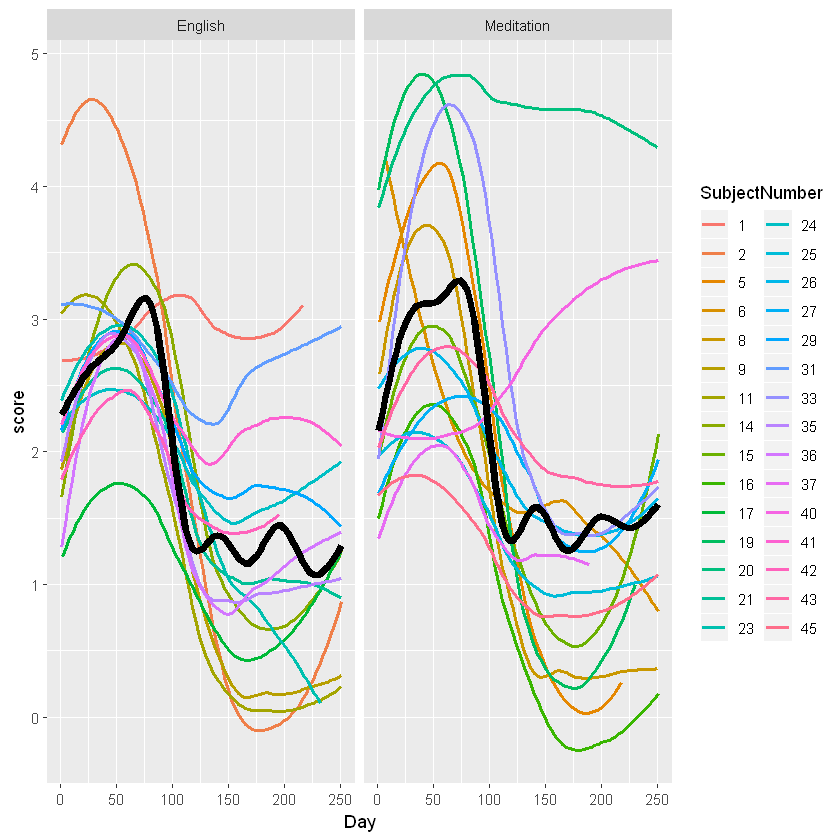

In [15]:
ggplot(tspmerg[tspmerg$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))

# Mix practice and motivation in to one dataframe
## AUX datasets 

In [16]:
aux.a<-tspmerg
aux.a$intervention<-'Practice'
aux.b<-tsmerg
aux.b$intervention<-'Motivation'
aux<-rbind(aux.a,aux.b)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 3648 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 3648 rows containing non-finite values (stat_smooth)."

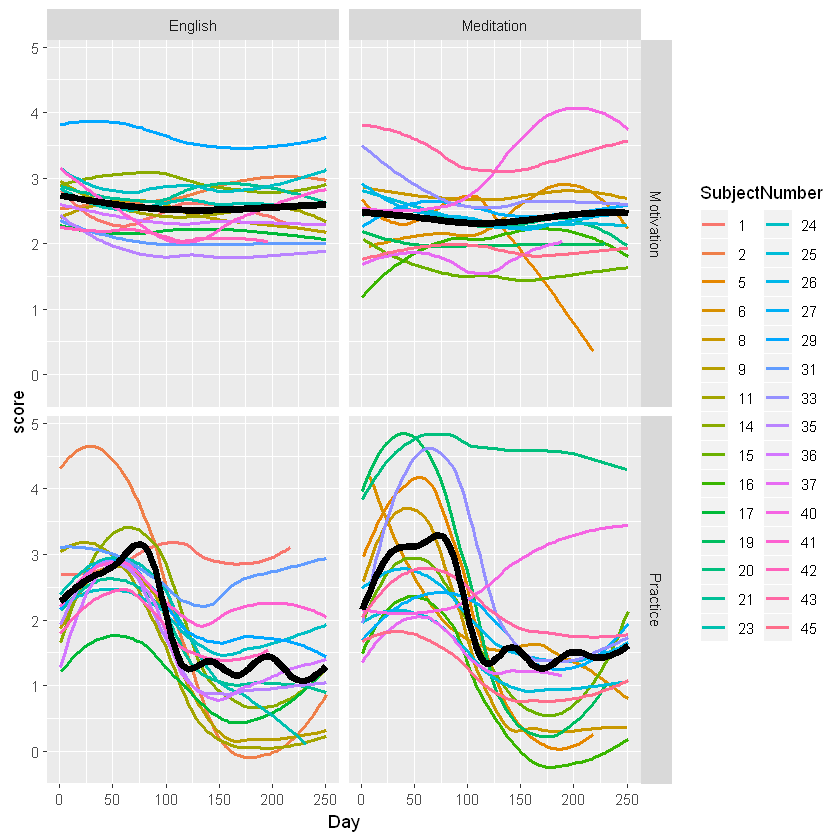

In [17]:
ggplot(aux[aux$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(intervention~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))



## Diff datasets: changes in the scores 

Now we want to see the differnce between the scores of each day from its consequent day. In other words we aim at visualazing the **changes** in the scores of each day in relation to the next day. For this purpose we remove the NAs from the dataset. 

### Formatting datasets 

In [18]:
tsm[sapply(tsm, is.nan)] <- NA
tsp[sapply(tsp, is.nan)] <- NA

**Diff datasets**: in which subtract the scores of each day from its previous 


In [19]:
tspdiff<-cbind(tsp[,1:4],t(diff(t(tsp[,5:255]))))
tsmdiff<-cbind(tsp[,1:4],t(diff(t(tsm[,5:255]))))

Now lets melt it so we can plot the differences. 
id.vars is for saying which columns **not to melt** or **keep**


In [20]:
tspmldiff<-melt(data=tspdiff, id.vars = 1:4)
tsmldiff<-melt(data=tsmdiff, id.vars = 1:4)
#renaming the columns 
colnames(tsmldiff)[5:6]<-c('Day', 'score')
colnames(tspmldiff)[5:6]<-c('Day', 'score')
#turn day in to numerical variable
tsmldiff$Day<-as.numeric(substring(as.character(tsmldiff$Day), 4))
tspmldiff$Day<-as.numeric(substring(as.character(tspmldiff$Day), 4))
#removing NAs 
tsmldiff[sapply(tsmldiff, is.nan)] <- NA
tspmldiff[sapply(tspmldiff, is.nan)] <- NA
#subject numbers into factor for plotting 
tsmldiff$SubjectNumber<-as.factor(tsmldiff$SubjectNumber)

tspmldiff$SubjectNumber<-as.factor(tspmldiff$SubjectNumber)

### Plotting motivation scores 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 2550 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 2550 rows containing non-finite values (stat_smooth)."

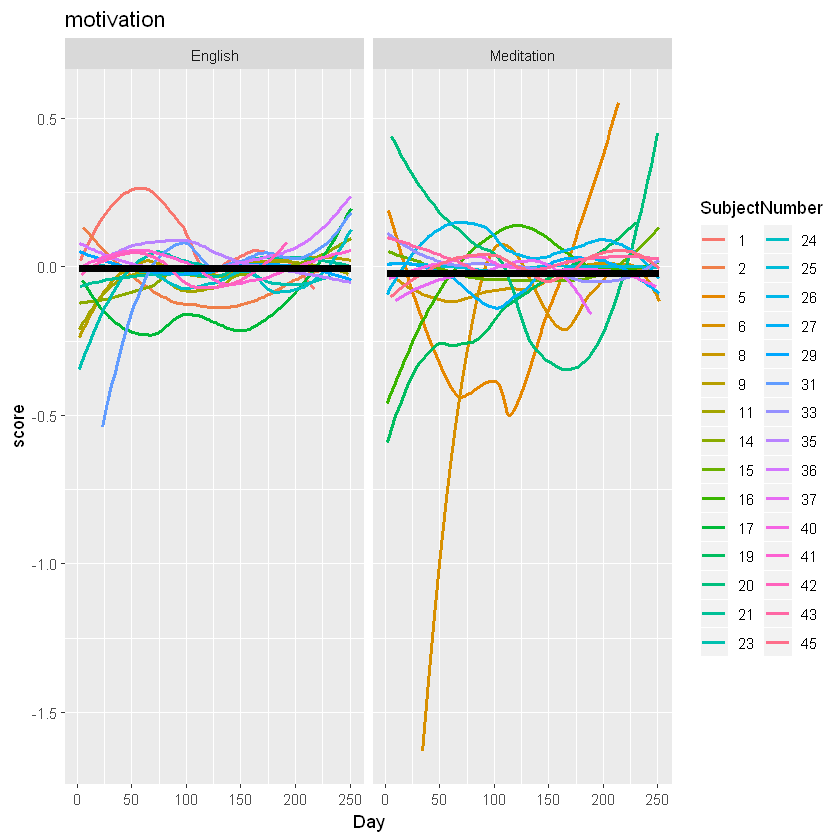

In [21]:
ggplot(tspmldiff[tspmldiff$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1)) +ggtitle('motivation')



### Plotting practice scores 

### All 4 graphs in one graph:

#### Merging datasets into one : aux1 dataset 

In [22]:
aux1.a<-tspmldiff
aux1.a$intervention<-'Practice'
aux1.b<-tsmldiff
aux1.b$intervention<-'Motivation'
aux1<-rbind(aux1.a,aux1.b)

### Plotting 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 5083 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 5083 rows containing non-finite values (stat_smooth)."

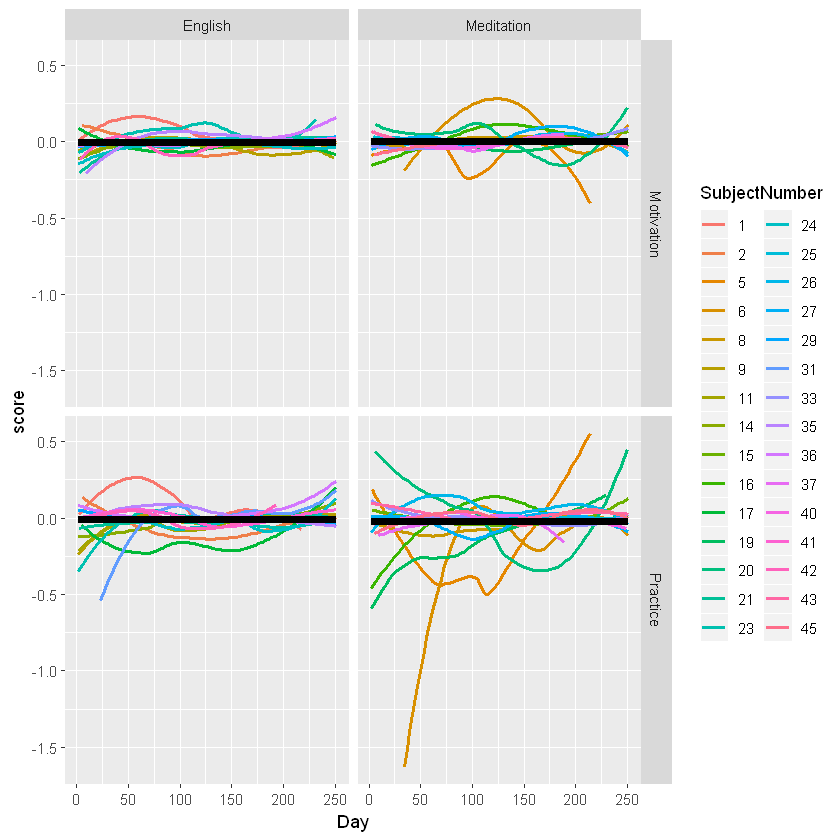

In [23]:
ggplot(aux1[aux1$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(intervention~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))


Here we see that there is not much difference from day to day in 4 graphs except for some individuals. Generally speaking, the meditation group have higher variance. 
**Note**: the subject number does not contain all 45 participants (the passive controls are out)


### A function to substract vectors containing daily scores :


In [24]:
corf<-function(x){
  #if we dont have length of 2 )
  if(length(x)!=2)NA else x[2]-x[1]
}

#### Does motivation has an effect on the practice time of the consequent day
##### Dateset auxag: from aux and with the corf function 

1. Building a new column for scores as numericals and perform the new function **corf** on it
2. this is how the aggregate formula translates: for each value of subject number, group (english/meditation) and day take the corf funciton of the sn column. so basically the function can vary for intervention for each value of sn. more precisely, take the difference between the scores of motivation-practice 
3. as can be seen in the aggregate function we need values that can group people. thus they have to be "factorial". thus we have changed the variable type of **Day** to factor. we need another column called **day** that is actually numerical and good for plotting.

In [25]:
aux$sn<-as.numeric(as.character(aux$score))
#aggregate perform the function on the selected datset and column
auxag<-aggregate(data=aux,sn~SubjectNumber+Group+as.factor(Day),FUN =corf)
colnames(auxag)[3]<-"day"
auxag$day<-as.numeric(as.character(auxag$day))


### Plotting auxag: Motivation - practice 
just with smoothed lines (removed the lines from time series)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 76 rows containing non-finite values (stat_smooth)."

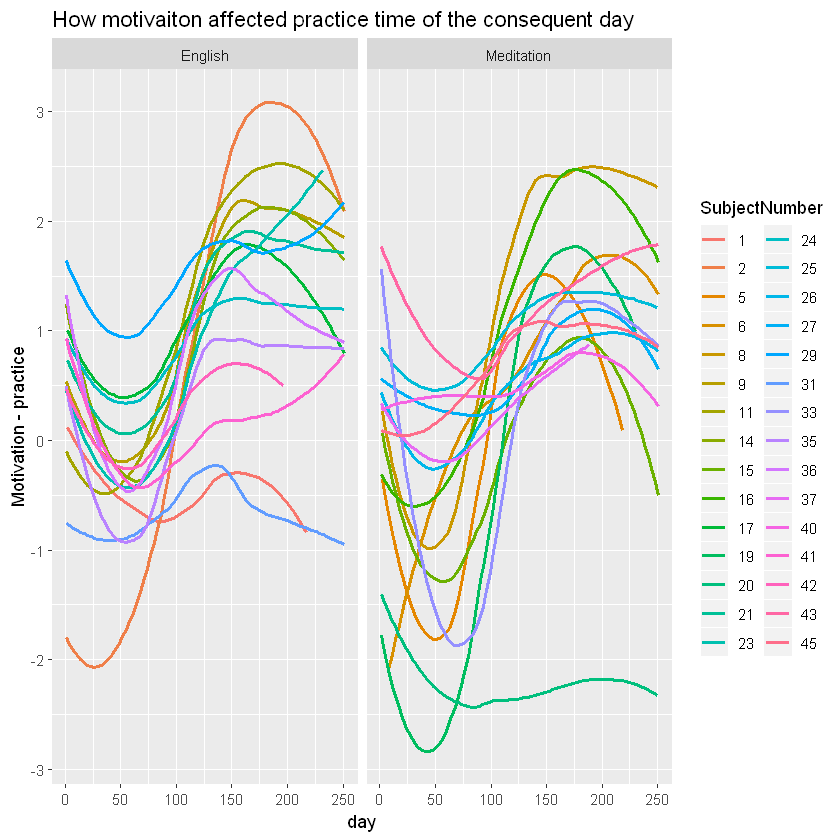

In [26]:
ggplot(auxag, aes(day, sn, color=SubjectNumber))+ facet_wrap(~Group) +geom_smooth(se=FALSE)+ ggtitle('How motivaiton affected practice time of the consequent day') + labs(y="Motivation - practice")


if you want to make sure which of the **sn** values were subtracted from which, you take the data for one participant and for two consequen days like below: 

In [27]:
auxag1<-aggregate(data=aux[aux$SubjectNumber==1 & aux$Day %in% 1:3,],sn~SubjectNumber+Group+as.factor(Day),FUN =corf)
auxag1

SubjectNumber,Group,as.factor(Day),sn
1,English,2,1
1,English,3,0


We can see that motivation-practice. usually it follows the alphabetic order.

### A better way to visualize this is through jitter plot

#### Auxm dataset: the data set for the jitter plot: 
We should have two columns
1. one starting from the scores of the first day through 250 (1 day less than 251). 
2. the other starts from the second day throught out the last day
then in each row we will have the data of two consequtive days: e.g. row 1: column 1: day 1 and column 2 :day 2 
now we can plot the score of each day as a function of its previous. similar to the chart above we will see whether the score of each day have an effect to its consequent. **difference**: above chart is showing the effect of motivation scores ont he consequent day. this chart will show the effects of each type of score (i.e. practice) on its consequent day's score i.e. what is the general scoring tendency for each questionaire (practice and motivatio)

**this is an example how this should look like:**




In [28]:
next_day<-aux$sn[aux$Day!=1 & aux$intervention=='Practice']
previous_day<-aux$sn[aux$Day!=251 & aux$intervention=='Practice']

Warning message:
"Removed 2550 rows containing missing values (geom_point)."

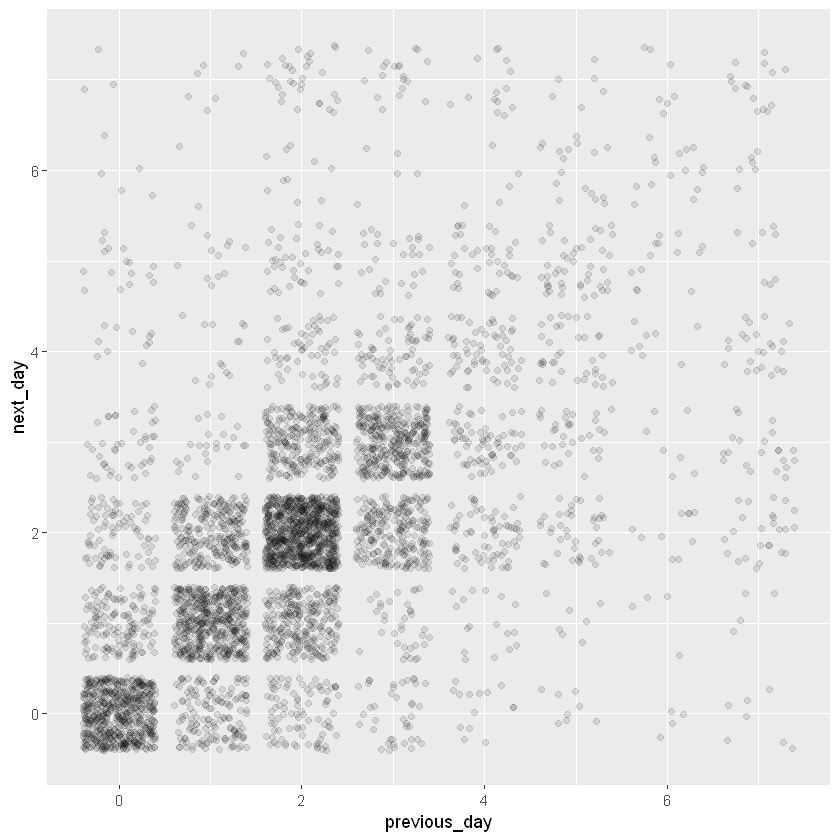

In [29]:
ggplot(NULL, aes(previous_day, next_day)) + geom_jitter(alpha=0.1)


Now we want to have a dataset that contains two columns 

A. scores of previous day 

B. score of the next day 

for this purpose first we have to make two datasets 
1. one contains all of the scores excluding the last day >auxp
2. the other that contains all of the scores excluding the first day> auxn

In [30]:
auxn<-aux[aux$Day!=1,]
auxp<-aux[aux$Day!=251,]
#then we harmonize the day count by substracting 1 from the auxn
auxn$Day<-auxn$Day-1

In [31]:
colnames(auxn)[8]<-"next_day"
colnames(auxp)[8]<-"previous_day"

### dataset:AUXM

In [32]:
auxm<-merge(auxn,auxp,all=T, by=c(1:5,7))


### Plot auxm

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

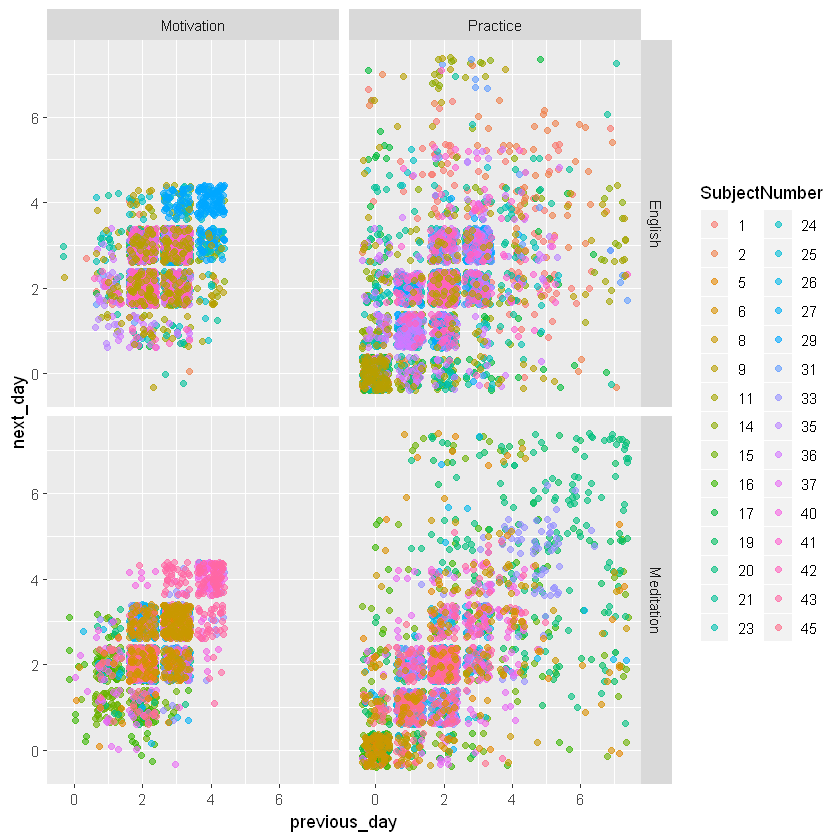

In [33]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + geom_jitter(alpha=0.6) +facet_grid(Group~intervention)


Here we hava the clusters for the whole duration. If we want to see in more precise manner, we divide it into more epoch. here is the column for dividing it in 5 epochs (~50 days in each epoch)


In [34]:
auxm$epoch<-cut(auxm$Day,breaks = 5, labels = paste("epoch",1:5,sep = "_"))


### Plot auxm with 5 epochs 

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

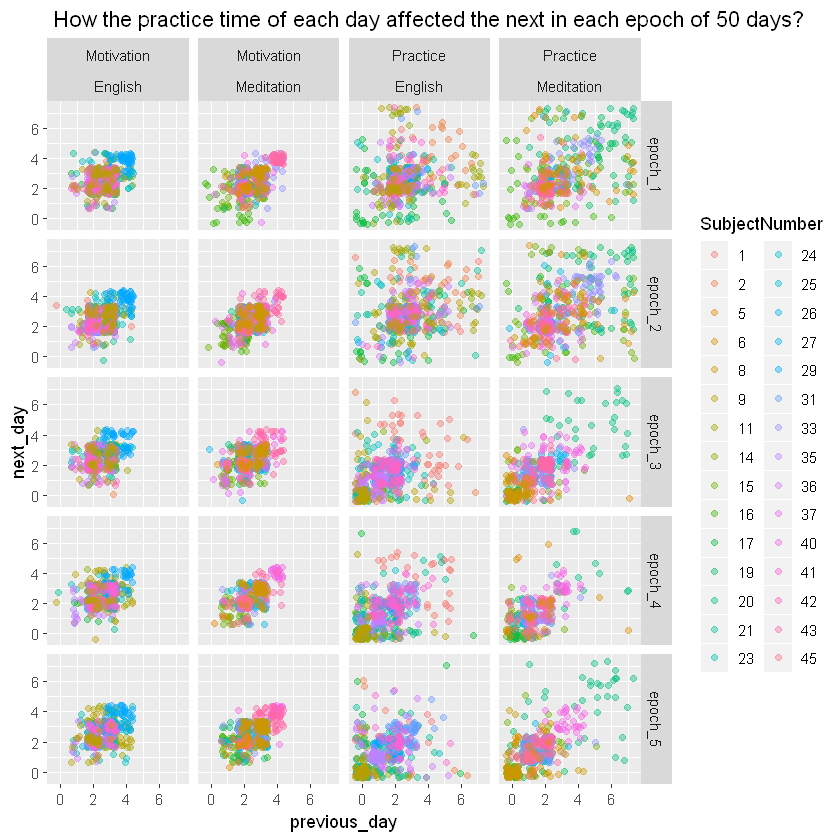

In [35]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + 
  geom_jitter(alpha=0.4) +facet_grid(epoch~intervention+Group) + labs (title=' How the practice time of each day affected the next in each epoch of 50 days? ')


here is another option for dividing it into 2 halves: 

In [36]:
auxm$halfcycle<-cut(auxm$Day,breaks = c(0,126,252), labels = c('First half of study(0-125d)', 'Second half of study (126-251)'))


### Plot auxm with 2 epochs (two epochs)

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

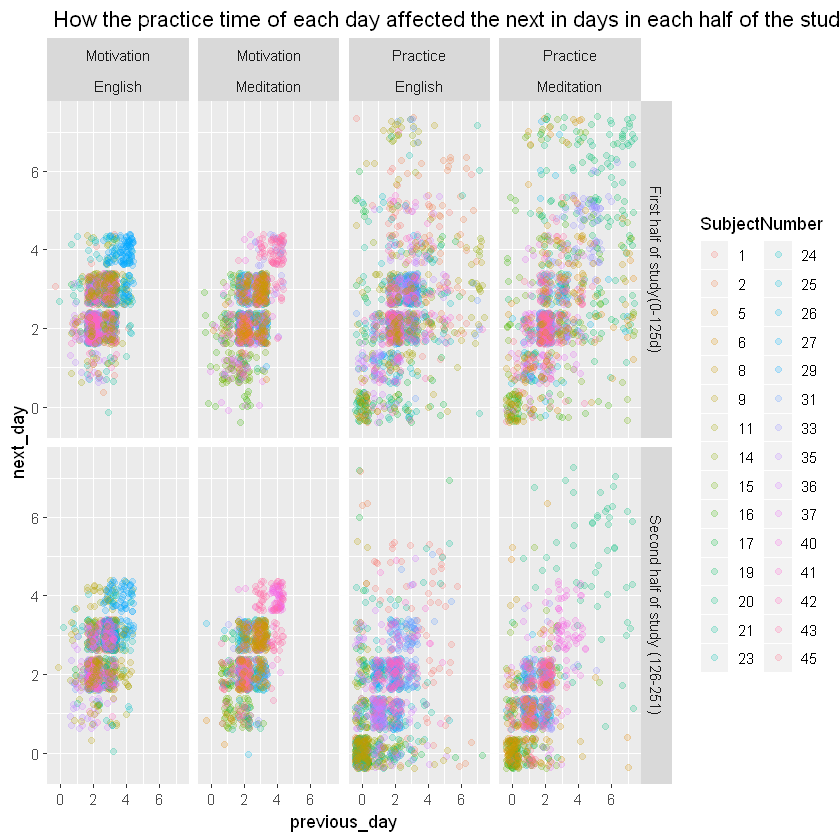

In [37]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + 
  geom_jitter(alpha=0.2) +facet_grid(halfcycle~intervention+Group) + labs (title=' How the practice time of each day affected the next in days in each half of the study duration? ')


**Note**:There are all sorts of playing with the look of this graph. we can change the color code, shape of the dots and so on. we also plotted a **violin plot** to see **individuals' variations more clearly**.find them in the original R file "timeseries.R" **this was the final useful plot**

now we can color subjects based on the questionnaires' scores. **here is the STAI**
**Note**: the final csv contains the **wrong old fMRI data**
### auxmfinal dataset: values for STAI scores


In [38]:
finalall<-read.table('Final.csv', sep = ',', header = T)
final<-finalall[,c(3,12,13)]
auxmfinal<-merge(auxm,final, all.x = T, by=c(1))


### Plot STAI A

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

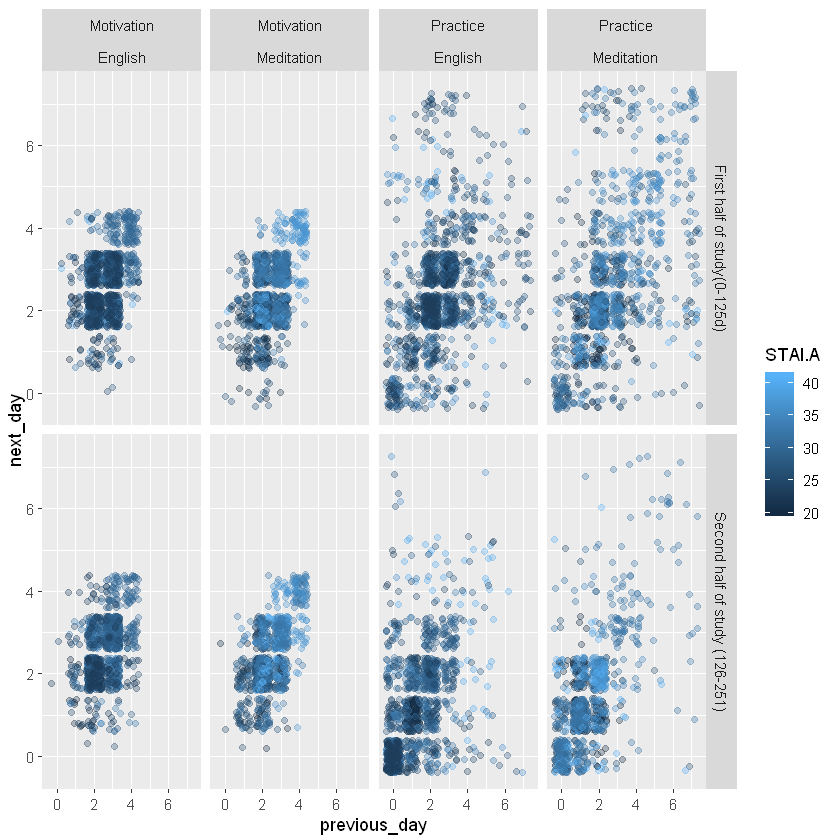

In [39]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.A)) + 
  geom_jitter(alpha=0.3) +facet_grid(halfcycle~intervention+Group) 

### Plot STAI B

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

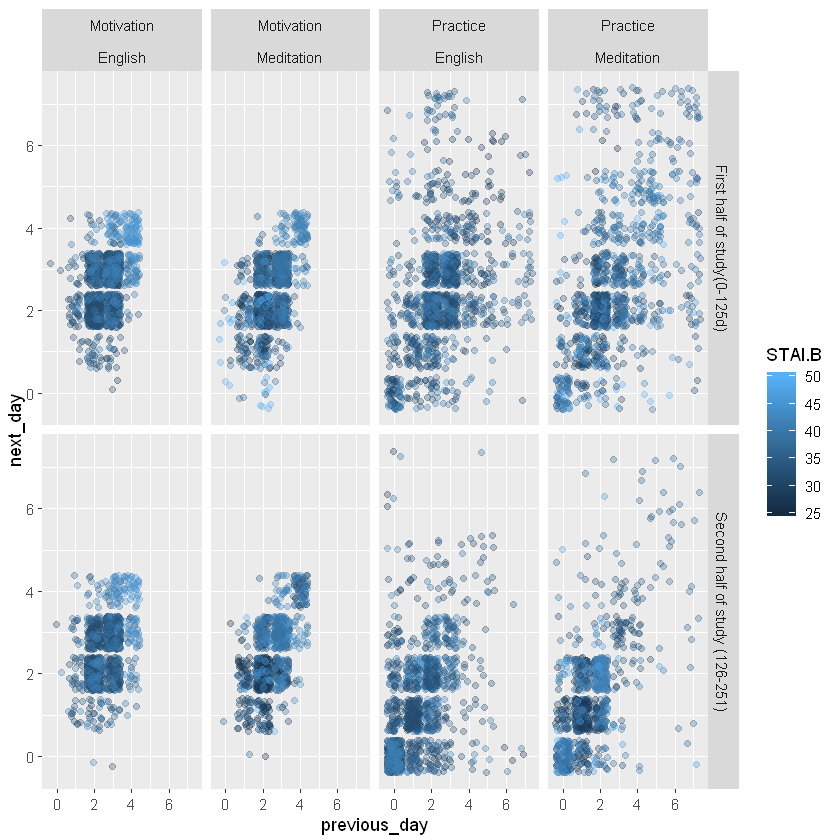

In [40]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.B)) + 
  geom_jitter(alpha=0.3) +facet_grid(halfcycle~intervention+Group) 

#### Lets factorize STAI B based on clinical data
* Low stress: 24-29
* Medium anxiety: 30-42
* High anxiety: 43-51 > generally higher than 43 is considered high anxiety

In [41]:
auxmfinal$STAI.Bfac<-cut(auxmfinal$STAI.B,breaks = c(24,29,43,51))
auxmfinal

SubjectNumber,Sex,Age,Group,Day,intervention,score.x,next_day,score.y,previous_day,epoch,halfcycle,STAI.A,STAI.B,STAI.Bfac
1,M,77,English,1,Motivation,3,3,NaN,NaN,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,1,Practice,2,2,NaN,NaN,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,10,Motivation,3,3,2,2,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,10,Practice,3,3,3,3,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,100,Motivation,2,2,1,1,epoch_2,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,100,Practice,2,2,1,1,epoch_2,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,101,Motivation,3,3,2,2,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,101,Practice,1,1,2,2,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,102,Motivation,2,2,3,3,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,102,Practice,2,2,1,1,epoch_3,First half of study(0-125d),40,32,"(29,43]"


### Plot STAI B for with clinical implications

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

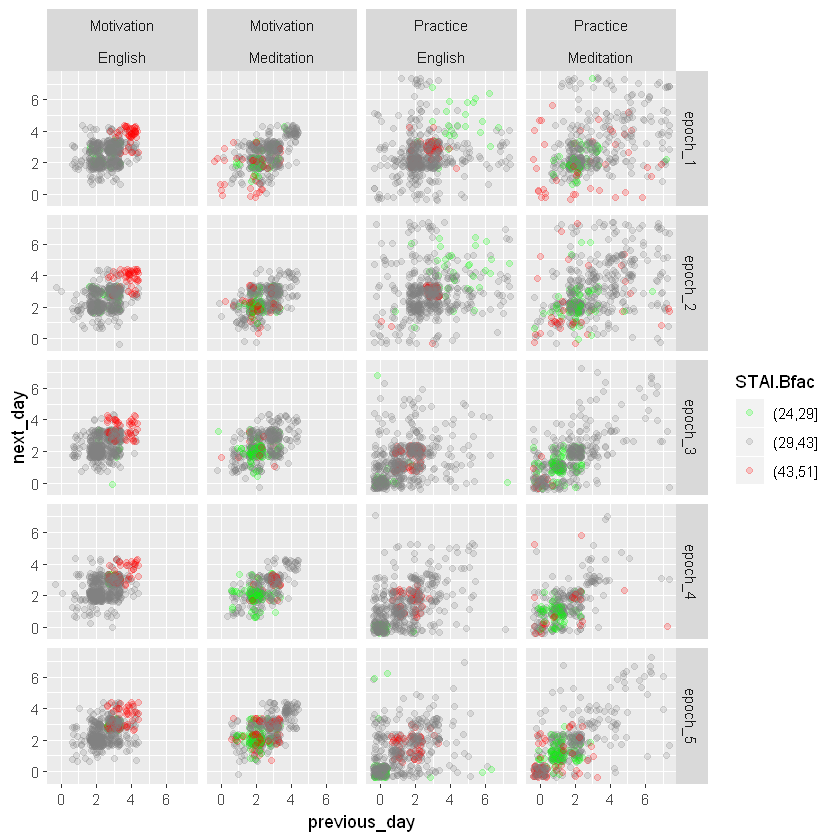

In [42]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.Bfac)) + 
  geom_jitter(alpha=0.2) +facet_grid(epoch~intervention+Group) +scale_color_manual(values=c("green", "grey50", "red"))

1. Here again we can visualize using different options like shape for gender and so on to see what are the potentially interesting factors 
2. In the original file you can find **coloring with all other questionnaires and brain data**. you can do that anytime since all of them are in the file **final.csv**

## Classification steps: FROM HERE WE JUST ANALYSE "PRACTICE TIME "
### Individual Density plots 

from figure above, we understood that it might be possibel to classify individuals based on their variability and average. thus now we want a new dataset that calculate the variance and average of the whole duration and each half of the study
now **why i preferred to only have two epochs?** because of this graph:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."

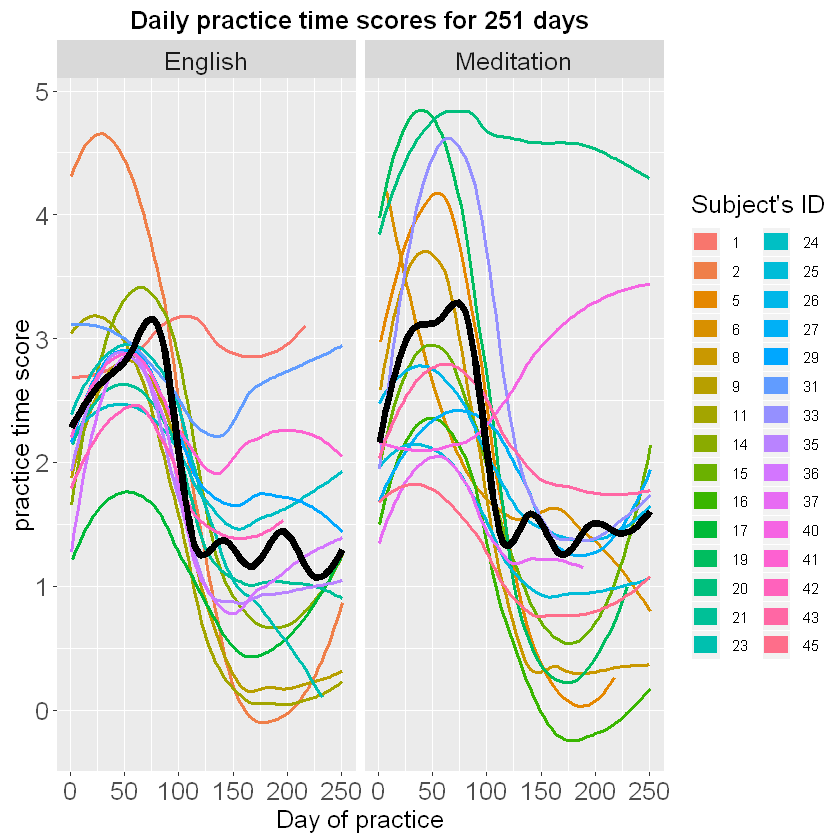

In [43]:
ggplot(aux[aux$SubjectNumber %in% c(1:45)&aux$intervention %in% 'Practice',], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))+
theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15))+ guides(colour = guide_legend(override.aes = list(size=5)))+
  xlab('Day of practice') + ylab('practice time score') + labs(title='Daily practice time scores for 251 days') + 
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) +labs(color="Subject's ID")

Arbirtrarily,the pracitce time variability changes at about half-study. to make sure that such interpretation is rigth, we run a var.test to compare whether the variability of first and second halves are different:

In [44]:
var.test(tspmerg[tspmerg$Day %in% 1:125,6],tspmerg[tspmerg$Day %in% 125:260,6])


	F test to compare two variances

data:  tspmerg[tspmerg$Day %in% 1:125, 6] and tspmerg[tspmerg$Day %in% 125:260, 6]
F = 1.4981, num df = 2953, denom df = 2760, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.391969 1.612071
sample estimates:
ratio of variances 
          1.498052 


As can be seen **they are significanlty different**. Thus now we will see how we can use **variance** and **average** to classify individuals. first we need variabels conrtaining the average and variance of the 
1. whole duration 
2. each half of the study

In [45]:
varp<-apply(tsp[,c(5:255)],1,var, na.rm=TRUE)
avgp<-apply(tsp[,c(5:255)],1,mean, na.rm=TRUE)
avg125<-apply(tsp[,c(130:255)],1,mean, na.rm=TRUE)
varp125<-apply(tsp[,c(130:255)],1,var, na.rm=TRUE)

In [46]:
vardat<- cbind(tsp[,c(1,4)],avgp,varp, avg125, varp125)

###  Density plots 

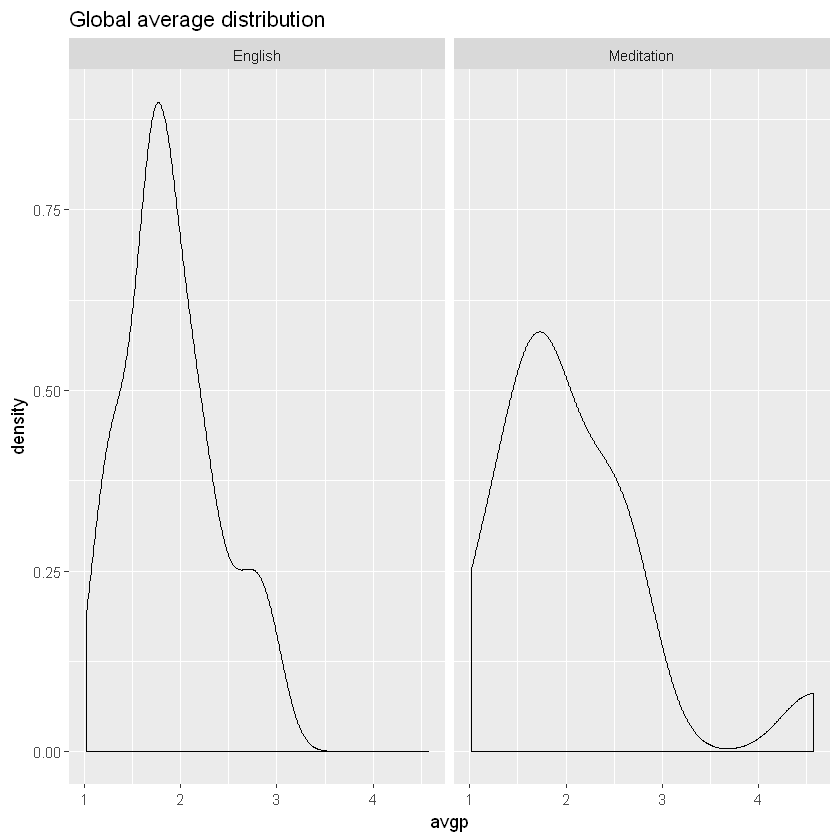

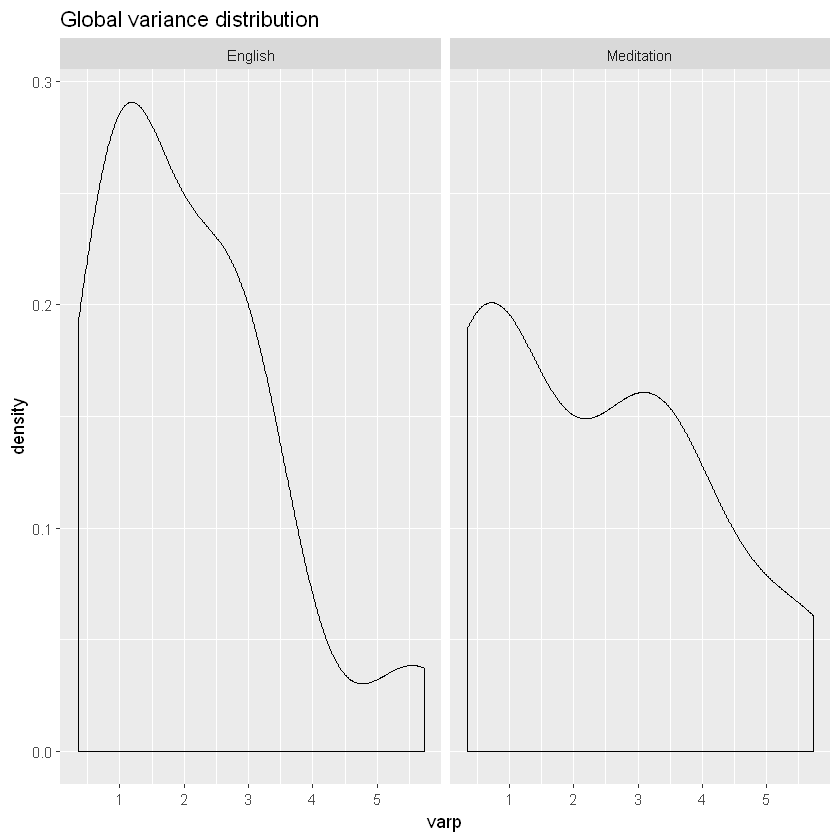

In [47]:
ggplot(vardat) + geom_density(aes(avgp, y=..density..)) + facet_wrap(~Group) + labs(title="Global average distribution")
ggplot(vardat) + geom_density(aes(varp, y=..density..))+ facet_wrap(~Group) + labs(title="Global variance distribution")

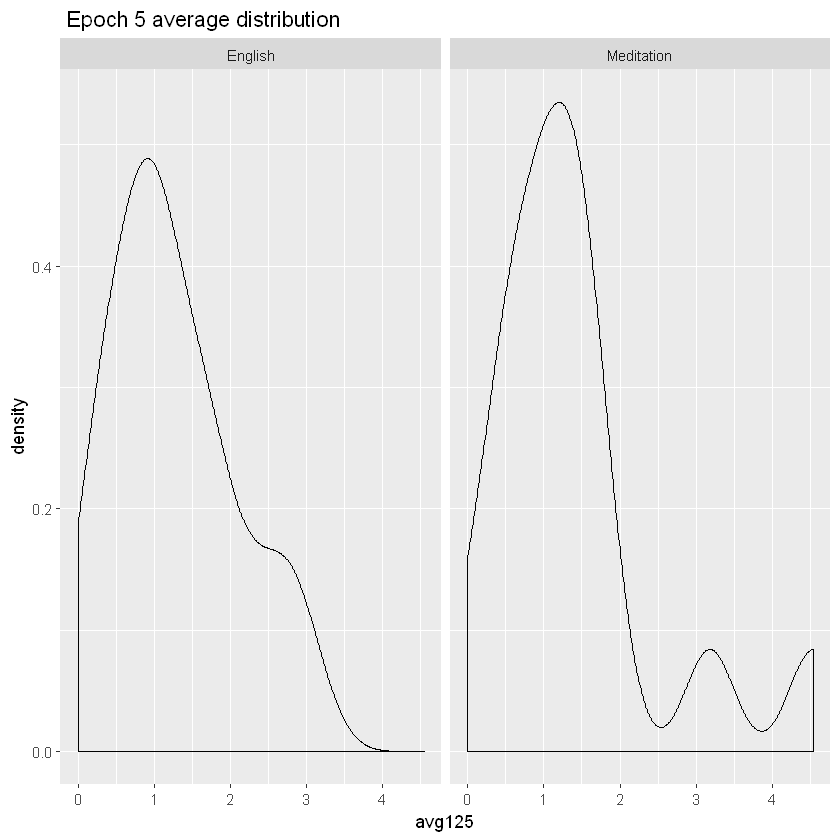

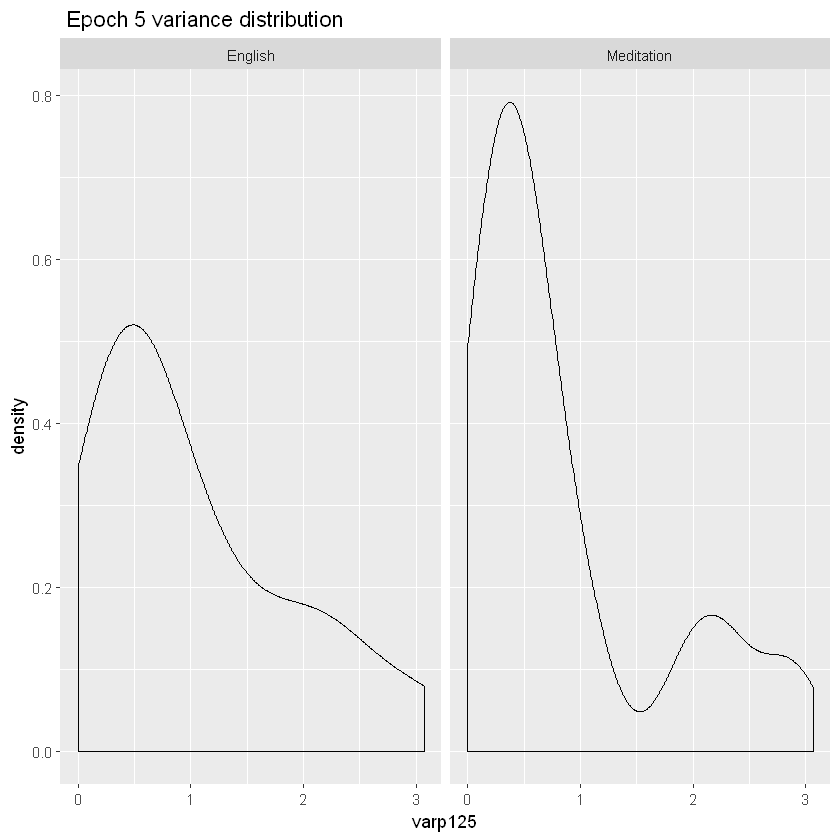

In [48]:
ggplot(vardat) + geom_density(aes(avg125, y=..density..))+ facet_wrap(~Group) + labs(title=" Epoch 5 average distribution")
ggplot(vardat) + geom_density(aes(varp125, y=..density..))+ facet_wrap(~Group) + labs(title=" Epoch 5 variance distribution")

### Now 2d density plots with subject points on it:

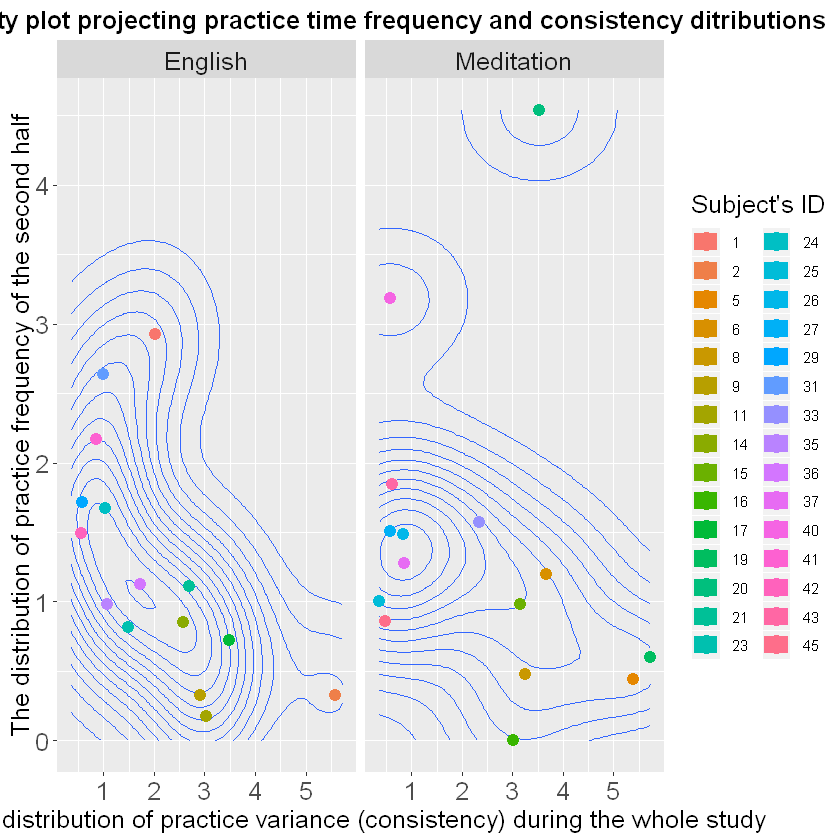

In [49]:
ggplot(vardat, aes(varp, avg125)) + geom_density2d() + ggtitle ("2D density plot projecting practice time frequency and consistency ditributions") +
    geom_point(aes(colour=as.factor(SubjectNumber)), size=3) +facet_wrap(~Group) +
facet_wrap(~Group) + xlab('The distribution of practice variance (consistency) during the whole study') +ylab('The distribution of practice frequency of the second half')+
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15))+ guides(colour = guide_legend(override.aes = list(size=5))) +
  labs(color="Subject's ID")

Again arbitrarily we have divided individuals into two clusters according to their **Practice variance**: 
1. **stable individuals**: those with practice variability lower than 2 
2. **Unstable individuals**: those with practice variability higher than 2
then we have grouped them and formed a new column called **stability** 

In [50]:
vardat$stability<-cut(vardat$varp,breaks = c(0,2,10),labels = c("stable", "unstable"))


In [51]:
vardat


SubjectNumber,Group,avgp,varp,avg125,varp125,stability
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable
9,English,1.334728,2.9126965,0.3247863,1.01429413,unstable
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable


In [52]:
ROI<-read.table('new_fmri.csv', sep = ',', header = T)

In [53]:
ROI

sub,intervention,Lamyg,Ramyg,LACC,RACC,LAI,ldlPFC,ldmPFC,RAI,RdlPFC,RdmPFC
1,English,-6.2386217,-5.1838156,-2.8110161,-3.11126384,1.8502431,-1.12882640,-0.21315054,0.27818134,5.3530017,-4.79842814
2,English,-1.4545635,1.2394806,7.2785824,4.55712369,2.4141933,3.81661696,-1.12648222,2.88342597,3.3550972,-1.73037058
5,Meditation,-0.2525594,-2.5365066,-0.3518598,1.07274553,-2.0646583,1.75124360,-0.53576243,-4.17458866,0.4506034,-2.31169278
6,Meditation,-10.3531331,-6.4124101,-0.7832501,-1.31299592,-1.0130651,-3.12077082,-2.24659822,-1.59089769,-4.7068094,-1.82181828
8,Meditation,-0.6254077,0.3773824,2.6038293,1.92437457,4.3572341,2.23302483,2.10744898,2.09813184,0.9149753,1.79222356
9,English,0.2110383,3.1710537,0.4285762,0.67015198,1.8897471,1.67350165,-0.36868671,-0.91364856,3.0238013,1.35627881
11,English,-2.3385941,-1.4016924,-6.6250041,-4.85355758,-0.5022065,-3.02060335,-1.52592580,-1.21723501,0.1253631,-3.97121154
14,English,-1.4462231,-1.8355241,1.6054928,0.65199626,-1.1457774,0.93889448,1.29558294,-1.11328061,-0.5383270,0.26718403
15,Meditation,1.8479753,-1.5777604,3.5938323,2.29685962,2.1789224,1.23568492,-0.03594588,2.76067676,2.6713392,1.38064190
16,Meditation,-0.4950163,-0.2838358,1.7499083,1.29771349,0.3534381,1.52575941,2.30448521,1.00116328,0.4169751,1.55886013


In [54]:
ROIfinal<-cbind(ROI, vardat[-25,c(3:7)])

#writing ROIfinal so that i can bring two laterals of one ROI adjacent 
#هشتگ رو لازم شد بردار
#write.csv(ROIfinal, "ROIfinal.csv", row.names = FALSE)





Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

اگر این رو مجبور شدی ران کنی دوباره حتما برو دستی این ستون های این فایل بالا که جدید رایت کردی رو بیار کنار هم.

In [55]:
#now again i read it as ROI2b2
ROI2b2<-read.csv("ROIfinal.csv",, sep = ',', header = T) 
colnames(ROI2b2)[2]<-"Intervention"
ROI2b2

sub,Intervention,avgp,varp,avg125,varp125,stability,Lamyg,Ramyg,LACC,RACC,LAI,RAI,ldlPFC,RdlPFC,ldmPFC,RdmPFC
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,-6.2386217,-5.1838156,-2.8110161,-3.11126384,1.8502431,0.27818134,-1.12882640,5.3530017,-0.21315054,-4.79842814
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,-1.4545635,1.2394806,7.2785824,4.55712369,2.4141933,2.88342597,3.81661696,3.3550972,-1.12648222,-1.73037058
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,-0.2525594,-2.5365066,-0.3518598,1.07274553,-2.0646583,-4.17458866,1.75124360,0.4506034,-0.53576243,-2.31169278
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,-10.3531331,-6.4124101,-0.7832501,-1.31299592,-1.0130651,-1.59089769,-3.12077082,-4.7068094,-2.24659822,-1.82181828
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,-0.6254077,0.3773824,2.6038293,1.92437457,4.3572341,2.09813184,2.23302483,0.9149753,2.10744898,1.79222356
9,English,1.334728,2.9126965,0.3247863,1.01429414,unstable,0.2110383,3.1710537,0.4285762,0.67015198,1.8897471,-0.91364856,1.67350165,3.0238013,-0.36868671,1.35627881
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,-2.3385941,-1.4016924,-6.6250041,-4.85355758,-0.5022065,-1.21723501,-3.02060335,0.1253631,-1.52592580,-3.97121154
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,-1.4462231,-1.8355241,1.6054928,0.65199626,-1.1457774,-1.11328061,0.93889448,-0.5383270,1.29558294,0.26718403
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,1.8479753,-1.5777604,3.5938323,2.29685962,2.1789224,2.76067676,1.23568492,2.6713392,-0.03594588,1.38064190
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,-0.4950163,-0.2838358,1.7499083,1.29771349,0.3534381,1.00116328,1.52575941,0.4169751,2.30448521,1.55886013


### plotgridavg125: A function to plot the data 

In [56]:
ROI2b2

sub,Intervention,avgp,varp,avg125,varp125,stability,Lamyg,Ramyg,LACC,RACC,LAI,RAI,ldlPFC,RdlPFC,ldmPFC,RdmPFC
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,-6.2386217,-5.1838156,-2.8110161,-3.11126384,1.8502431,0.27818134,-1.12882640,5.3530017,-0.21315054,-4.79842814
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,-1.4545635,1.2394806,7.2785824,4.55712369,2.4141933,2.88342597,3.81661696,3.3550972,-1.12648222,-1.73037058
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,-0.2525594,-2.5365066,-0.3518598,1.07274553,-2.0646583,-4.17458866,1.75124360,0.4506034,-0.53576243,-2.31169278
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,-10.3531331,-6.4124101,-0.7832501,-1.31299592,-1.0130651,-1.59089769,-3.12077082,-4.7068094,-2.24659822,-1.82181828
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,-0.6254077,0.3773824,2.6038293,1.92437457,4.3572341,2.09813184,2.23302483,0.9149753,2.10744898,1.79222356
9,English,1.334728,2.9126965,0.3247863,1.01429414,unstable,0.2110383,3.1710537,0.4285762,0.67015198,1.8897471,-0.91364856,1.67350165,3.0238013,-0.36868671,1.35627881
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,-2.3385941,-1.4016924,-6.6250041,-4.85355758,-0.5022065,-1.21723501,-3.02060335,0.1253631,-1.52592580,-3.97121154
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,-1.4462231,-1.8355241,1.6054928,0.65199626,-1.1457774,-1.11328061,0.93889448,-0.5383270,1.29558294,0.26718403
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,1.8479753,-1.5777604,3.5938323,2.29685962,2.1789224,2.76067676,1.23568492,2.6713392,-0.03594588,1.38064190
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,-0.4950163,-0.2838358,1.7499083,1.29771349,0.3534381,1.00116328,1.52575941,0.4169751,2.30448521,1.55886013


Loading required package: grid


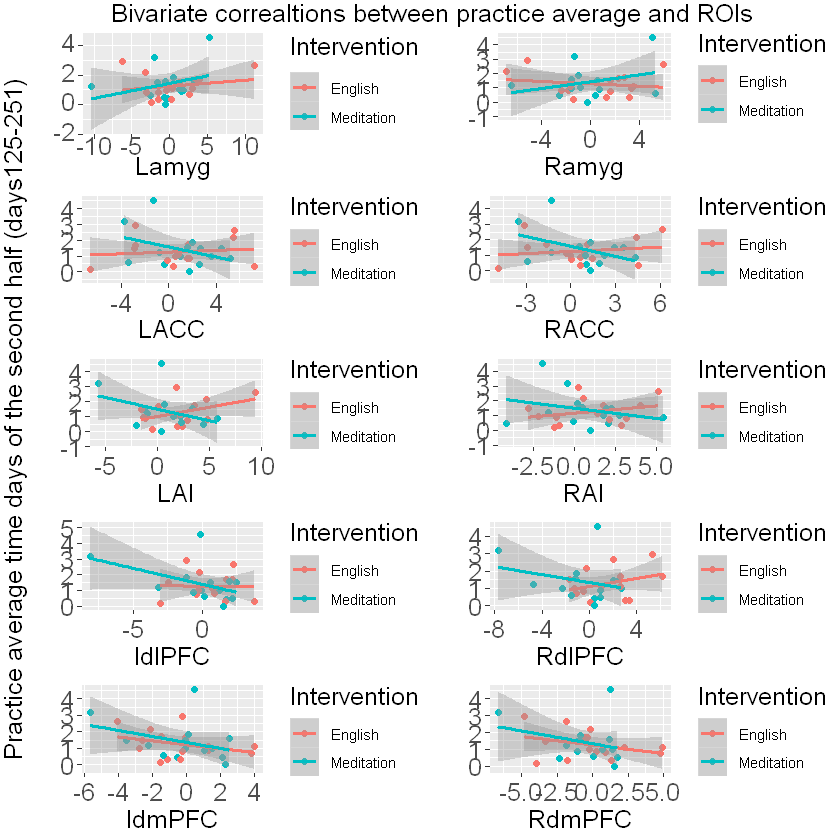

In [57]:
plotgridavg125 = function (data, column)
  ggplot(data = ROI2b2, aes_string(x = column,y='avg125',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15)) +
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) 

avg125plots <- lapply(colnames(ROI2b2[,c(8:17)]), plotgridavg125, data = ROI2b2[,c(5,8:17)])
require(gridExtra)
require(grid)
grid.arrange(grobs=avg125plots,left= textGrob("Practice average time days of the second half (days125-251)",gp=gpar(fontsize=15),rot = 90),top=textGrob("Bivariate correaltions between practice average and ROIs", gp=gpar(fontsize=15)), ncol=2)


### Variance 

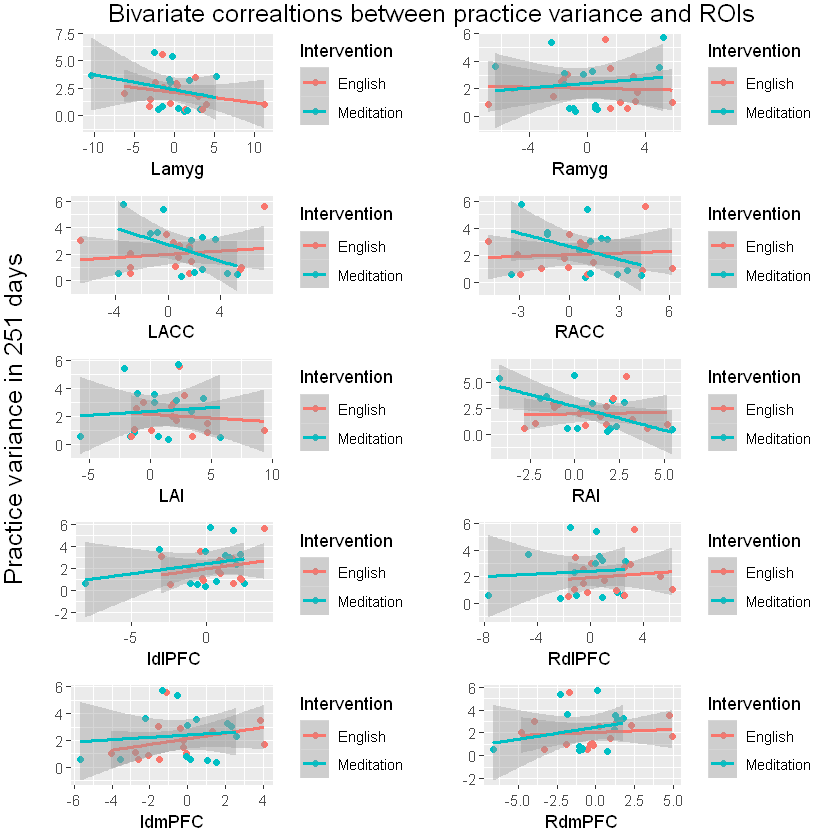

In [58]:
plotgridvarf = function (data, column)
  ggplot(data = ROI2b2, aes_string(x = column,y='varp',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') 
varpplots2 <- lapply(colnames(ROI2b2[,c(8:17)]), plotgridvarf, data = ROI2b2[,c(4,8:17)])
grid.arrange(grobs=varpplots2,left= textGrob("Practice variance in 251 days",,gp=gpar(fontsize=15),rot = 90),top=textGrob("Bivariate correaltions between practice variance and ROIs", gp=gpar(fontsize=15)), ncol=2)



## Mohammad function:  pvals on plots

## Plots with non-corrected pvals

### Average plots  

In [59]:
lm.coeff <- function(input.df){
    
    calc.p.value <- function(col,  intercept=TRUE) {
#     print(col)
    .formula <- reformulate(termlabels = paste(col, "Intervention", sep=":"), response = 'avg125', intercept = intercept)
    mymodel.lm <-lm(.formula, data=input.df)
    er<-summary(mymodel.lm)
#     print(er$coefficient) 
    c(er$coefficient[c(2,3),c(1,4)])
#     print(er$coefficient[c(2,3),c(1,4)])
    }
    
    variables.list <- colnames(input.df)[colnames(input.df) != 'avg125' & colnames(input.df) != 'Intervention']
#     print(variables.list)
    p.rule.list <- lapply(variables.list, calc.p.value)
    coeff.names <- data.frame(c("BEnglish", "BMeditation", "PEnglish", "PMeditation"))
    df <- setNames(cbind(coeff.names, data.frame(p.rule.list)), c('coeffs', variables.list))
    rownames(df) <- df$coeffs
    df$coeffs <- NULL
    df
}


In [60]:
new_results <- lm.coeff(ROI2b2[,c(2,5,8:17)])

In [61]:
important_colnames = colnames(ROI2b2[,c(8:17)])


[1] 0.03748771 0.09914796 0.56761895 0.21235208
[1] -0.04336512  0.11669604  0.57423920  0.23506666
[1]  0.01873862 -0.13470717  0.79939468  0.17950370
[1]  0.0376177 -0.1882259  0.6718986  0.1126668
[1]  0.07561476 -0.13689312  0.36003308  0.14519762
[1]  0.06939597 -0.11867150  0.53694195  0.31765160
[1] -0.01721342 -0.20481779  0.90206225  0.04337691
[1]  0.09007036 -0.11939602  0.38240533  0.22177575
[1] -0.1108630 -0.1843891  0.3370620  0.1232244
[1] -0.1000300 -0.1564402  0.2946829  0.2098943


Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'

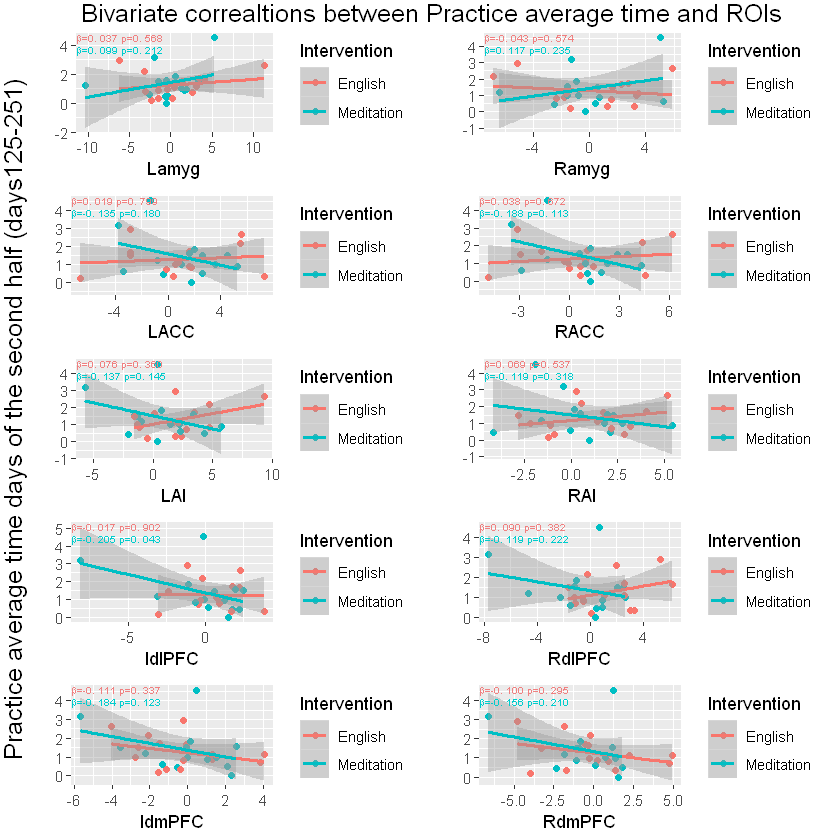

In [62]:
plotgridvarf = function (column, data){
#   print(column)
  .results <- lm.coeff(ROI2b2[,c(2,5,8:17)])
#   print(.results)
#   print(colnames(.results))
#   print(.results[,c(column)])
  coeffs = setNames(data.frame(new_results[, c(column)]), 'coeffs')[[1]]
  print(coeffs)
  ggplot(data = data, aes_string(x = column,y='avg125',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 1,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[1], coeffs[3])),
           fontface = "italic",
           size= 2.2,
           color = "lightcoral") +
    
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 2.2,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[2], coeffs[4])),
           fontface = "italic",
           size= 2.2,
           color = "cyan3")

    #   geom_text(
# #       data = coeffs[c(1, 3)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="lightcoral", size=2)) +
#   geom_text(
# #       data = coeffs[c(2,4)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="cyan", size=2))
    }

important_colnames = colnames(ROI2b2[,c(8:17)])
varpplots2 <- lapply(important_colnames, plotgridvarf, data=ROI2b2)
grid.arrange(grobs=varpplots2,
             left= textGrob("Practice average time days of the second half (days125-251)",,gp=gpar(fontsize=15),rot = 90), 
             top=textGrob("Bivariate correaltions between Practice average time and ROIs", gp=gpar(fontsize=15)), ncol=2)


### Variance plots

In [63]:
lm.coeff2 <- function(input.df){
    
    calc.p.value <- function(col,  intercept=TRUE) {
#     print(col)
    .formula <- reformulate(termlabels = paste(col, "Intervention", sep=":"), response = 'varp', intercept = intercept)
    mymodel.lm <-lm(.formula, data=input.df)
    er<-summary(mymodel.lm)
#     print(er$coefficient) 
    c(er$coefficient[c(2,3),c(1,4)])
#     print(er$coefficient[c(2,3),c(1,4)])
    }
    
    variables.list <- colnames(input.df)[colnames(input.df) != 'varp' & colnames(input.df) != 'Intervention']
#     print(variables.list)
    p.rule.list <- lapply(variables.list, calc.p.value)
    coeff.names <- data.frame(c("BEnglish", "BMeditation", "PEnglish", "PMeditation"))
    df <- setNames(cbind(coeff.names, data.frame(p.rule.list)), c('coeffs', variables.list))
    rownames(df) <- df$coeffs
    df$coeffs <- NULL
    df
}

In [64]:
new_results2 <- lm.coeff2(ROI2b2[,c(2,4,8:17)])

[1] -0.09706134 -0.13943926  0.35578516  0.26969605
[1] -0.02694040  0.07827867  0.83151909  0.62425333
[1]  0.04380725 -0.25635584  0.70573123  0.10696508
[1]  0.02450474 -0.27437832  0.86450314  0.15139909
[1] -0.07260520  0.06067438  0.59984330  0.69595401
[1] -0.02996143 -0.41561768  0.85748554  0.02408705
[1] 0.1495839 0.1799807 0.5262207 0.2770755
[1] 0.02255470 0.03454518 0.89472729 0.82949676
[1] 0.22408378 0.08022855 0.24251208 0.67841595
[1] 0.0583886 0.1848925 0.7085995 0.3661664


Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'

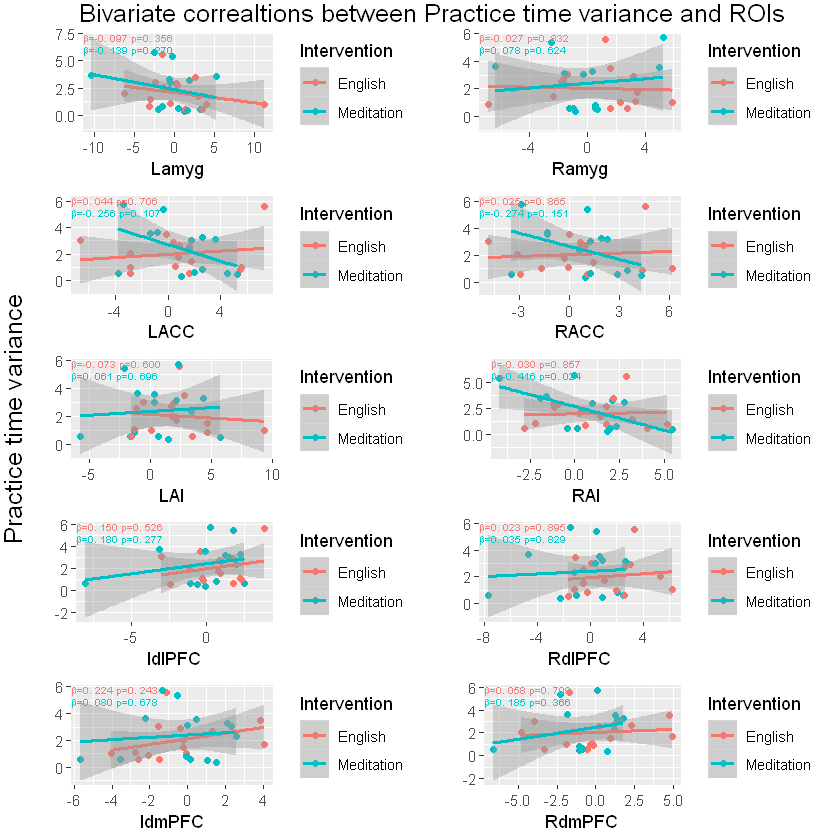

In [65]:
plotgridvarp = function (column, data){
#   print(column)
  .results <- lm.coeff2(ROI2b2[,c(2,4,8:17)])
#   print(.results)
#   print(colnames(.results))
#   print(.results[,c(column)])
  coeffs = setNames(data.frame(new_results2[, c(column)]), 'coeffs')[[1]]
  print(coeffs)
  ggplot(data = data, aes_string(x = column,y='varp',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 1,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[1], coeffs[3])),
           fontface = "italic",
           size= 2.2,
           color = "lightcoral") +
    
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 2.2,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[2], coeffs[4])),
           fontface = "italic",
           size= 2.2,
           color = "cyan3")

    #   geom_text(
# #       data = coeffs[c(1, 3)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="lightcoral", size=2)) +
#   geom_text(
# #       data = coeffs[c(2,4)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="cyan", size=2))
    }

important_colnames = colnames(ROI2b2[,c(8:17)])
varpplots2 <- lapply(important_colnames, plotgridvarp, data=ROI2b2)
grid.arrange(grobs=varpplots2,
             left= textGrob("Practice time variance",,gp=gpar(fontsize=15),rot = 90), 
             top=textGrob("Bivariate correaltions between Practice time variance and ROIs", gp=gpar(fontsize=15)), ncol=2)


WE SHOULD LOOK FOR THE FUNCTION FOR THE LINEAR REGRESSION NOW
AND THEN PERFORM THE MULTIPLE COMPARISON ERROR 
THEN WE SEE WHAT STAYS 


### ROImelt: melted df of ROI2b2 for BOXPLOTS

In [66]:
ROImelt<-melt(ROI2b2,id.vars = c(1:7))
colnames(ROImelt)[7]<-'practice_stability'
colnames(ROImelt)[8]<-'Location'
ROImelt


sub,Intervention,avgp,varp,avg125,varp125,practice_stability,Location,value
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,Lamyg,-6.2386217
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,Lamyg,-1.4545635
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,Lamyg,-0.2525594
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,Lamyg,-10.3531331
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,Lamyg,-0.6254077
9,English,1.334728,2.9126965,0.3247863,1.01429414,unstable,Lamyg,0.2110383
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,Lamyg,-2.3385941
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,Lamyg,-1.4462231
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,Lamyg,1.8479753
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,Lamyg,-0.4950163


#### Forming a new column to include a varaible that is a mixture of stability and intervention 

In [67]:
e<-which(ROImelt$Intervention=='English ' & ROImelt$practice_stability=='stable')
f<-which(ROImelt$Intervention=='English ' & ROImelt$practice_stability=='unstable')
g<-which(ROImelt$Intervention=='Meditation ' & ROImelt$practice_stability=='stable')
h<-which(ROImelt$Intervention=='Meditation ' & ROImelt$practice_stability=='unstable')



In [68]:
ROImelt[e,10]<-'ES'
ROImelt[f,10]<-'EU'
ROImelt[g,10]<-'MS'
ROImelt[h,10]<-'MU'
colnames(ROImelt)[10]<-'group_stability'
ROImelt


sub,Intervention,avgp,varp,avg125,varp125,practice_stability,Location,value,group_stability
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,Lamyg,-6.2386217,EU
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,Lamyg,-1.4545635,EU
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,Lamyg,-0.2525594,MU
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,Lamyg,-10.3531331,MU
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,Lamyg,-0.6254077,MU
9,English,1.334728,2.9126965,0.3247863,1.01429414,unstable,Lamyg,0.2110383,EU
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,Lamyg,-2.3385941,EU
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,Lamyg,-1.4462231,EU
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,Lamyg,1.8479753,MU
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,Lamyg,-0.4950163,MU


### Boxplots without FDR correction

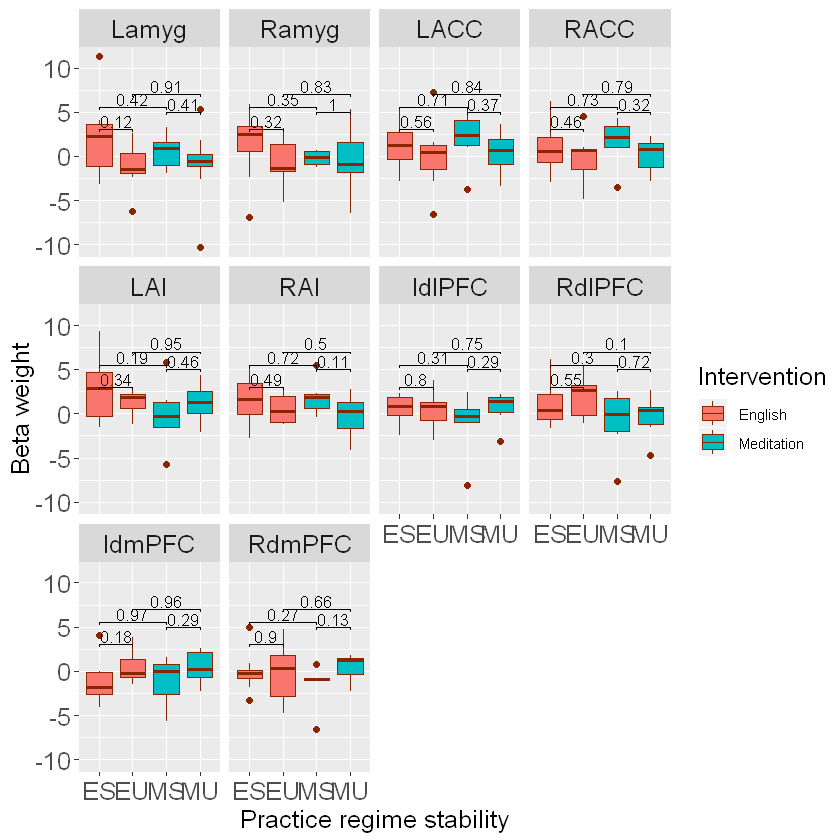

In [69]:
ggplot(data=ROImelt, aes(x=group_stability,y=value)) + geom_boxplot(aes(fill=Intervention),color="orangered4") + facet_wrap(~Location)+
  geom_signif(comparisons = list(c('ES','EU'),c('MS','MU'),c('ES','MS'),c('EU','MU')),tip_length = 0.01, test = "t.test",textsize = 3.5, na.rm = TRUE,y_position = c(3,5,5.5,7)) + xlab("Practice regime stability") + ylab("Beta weight") +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15))



so the previous results are not unfortunately there 

### Mohammad <3 formula: which p values are significant 


### First formula:varp as the response variable

In [70]:
get.pvalue.dataframe <- function(input.df){
  
  calc.p.value <- function(col,  intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'varp', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input.df)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
  }
  
  variables.list <- colnames(input.df)[colnames(input.df) != 'varp']
  p.rule.list <- lapply(variables.list, calc.p.value)
  setNames(data.frame(p.rule.list), c(variables.list))
}

### Second Formula: avg125 as the response varaible

In [71]:
get.pvalue.dataframe2 <- function(input.df){
  
  calc.p.value <- function(col,  intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'avg125', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input.df)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
  }
  
  variables.list <- colnames(input.df)[colnames(input.df) != 'avg125']
  p.rule.list <- lapply(variables.list, calc.p.value)
  setNames(data.frame(p.rule.list), c(variables.list))
}


In [72]:
ROI2b2

sub,Intervention,avgp,varp,avg125,varp125,stability,Lamyg,Ramyg,LACC,RACC,LAI,RAI,ldlPFC,RdlPFC,ldmPFC,RdmPFC
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,-6.2386217,-5.1838156,-2.8110161,-3.11126384,1.8502431,0.27818134,-1.12882640,5.3530017,-0.21315054,-4.79842814
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,-1.4545635,1.2394806,7.2785824,4.55712369,2.4141933,2.88342597,3.81661696,3.3550972,-1.12648222,-1.73037058
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,-0.2525594,-2.5365066,-0.3518598,1.07274553,-2.0646583,-4.17458866,1.75124360,0.4506034,-0.53576243,-2.31169278
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,-10.3531331,-6.4124101,-0.7832501,-1.31299592,-1.0130651,-1.59089769,-3.12077082,-4.7068094,-2.24659822,-1.82181828
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,-0.6254077,0.3773824,2.6038293,1.92437457,4.3572341,2.09813184,2.23302483,0.9149753,2.10744898,1.79222356
9,English,1.334728,2.9126965,0.3247863,1.01429414,unstable,0.2110383,3.1710537,0.4285762,0.67015198,1.8897471,-0.91364856,1.67350165,3.0238013,-0.36868671,1.35627881
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,-2.3385941,-1.4016924,-6.6250041,-4.85355758,-0.5022065,-1.21723501,-3.02060335,0.1253631,-1.52592580,-3.97121154
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,-1.4462231,-1.8355241,1.6054928,0.65199626,-1.1457774,-1.11328061,0.93889448,-0.5383270,1.29558294,0.26718403
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,1.8479753,-1.5777604,3.5938323,2.29685962,2.1789224,2.76067676,1.23568492,2.6713392,-0.03594588,1.38064190
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,-0.4950163,-0.2838358,1.7499083,1.29771349,0.3534381,1.00116328,1.52575941,0.4169751,2.30448521,1.55886013


In [73]:
get.pvalue.dataframe2(ROI2b2[ROI2b2$Intervention=='English ', c(5,8:17)])

Lamyg,Ramyg,LACC,RACC,LAI,RAI,ldlPFC,RdlPFC,ldmPFC,RdmPFC
0.01611268,0.5232738,0.4788701,0.322027,0.09635019,0.2950705,0.9822174,0.3651575,0.2492108,0.3050083


In [74]:
ROIdf <- ROI2b2[ROI2b2$Intervention=='Meditation ', c(4,8:17)]

pvalvarp<-get.pvalue.dataframe(ROIdf) #for meditaiton 

pvalvarp[2,]<-get.pvalue.dataframe(ROI2b2[ROI2b2$Intervention=='English ', c(4,8:17)]) #for english

rownames(pvalvarp)[1]<-'Meditationvar'
rownames(pvalvarp)[2]<-'Englishvar'


In [75]:
ROIdf2 <- ROI2b2[ROI2b2$Intervention=='Meditation ', c(5,8:17)]

pvalavg<-get.pvalue.dataframe2(ROIdf2)
pvalavg[2,]<-get.pvalue.dataframe2(ROI2b2[ROI2b2$Intervention=='English ', c(5,8:17)]) #for english

rownames(pvalavg)[1]<-'Meditationavg'
rownames(pvalavg)[2]<-'Englishavg'




# Pval table 

In [76]:
medavgp<-pvalavg[1,]
pvalavg[3,]<-p.adjust(medavgp,'fdr')
rownames(pvalavg)[3]<-'Medavg-FDR'
pvalavg[4,]<-p.adjust(pvalavg[2,],'fdr')
rownames(pvalavg)[4]<-'engavg-FDR'

pvalvarp[3,]<-p.adjust(pvalvarp[1,],'fdr')
rownames(pvalvarp)[3]<-'Medvar-FDR'
pvalvarp[4,]<-p.adjust(pvalvarp[2,],'fdr')
rownames(pvalvarp)[4]<-'engvar-FDR'

#binding the table into one 
pvaltable<-rbind(pvalavg,pvalvarp)
pvaltable

,Lamyg,Ramyg,LACC,RACC,LAI,RAI,ldlPFC,RdlPFC,ldmPFC,RdmPFC
Meditationavg,0.58887661,0.7867535,0.32498794,0.19487397,0.07071845,0.69753266,0.01574035,0.1001529,0.04040202,0.02381597
Englishavg,0.01611268,0.5232738,0.47887006,0.32202700,0.09635019,0.29507047,0.98221744,0.3651575,0.24921081,0.30500826
Medavg-FDR,0.73609577,0.7867535,0.46426848,0.32478995,0.17679612,0.77503629,0.11907985,0.2003058,0.13467340,0.11907985
engavg-FDR,0.16112678,0.5814153,0.58141533,0.52165352,0.48175093,0.52165352,0.98221744,0.5216535,0.52165352,0.52165352
Meditationvar,0.36594680,0.6572332,0.04937823,0.08390384,0.78561564,0.03855249,0.38742619,0.7989799,0.71800797,0.42013118
Englishvar,0.31841073,0.7296323,0.96409760,0.85211675,0.61189905,0.89194929,0.63551981,0.8167455,0.05168815,0.45364577
Medvar-FDR,0.70021863,0.7989799,0.24689115,0.27967947,0.79897988,0.24689115,0.70021863,0.7989799,0.79897988,0.70021863
engvar-FDR,0.96409760,0.9640976,0.96409760,0.96409760,0.96409760,0.96409760,0.96409760,0.9640976,0.51688148,0.96409760


Now why nothing stays?

In the previous dataset we mistakenly had LE-HE videos for half of the participants 
now that it is corrected we shoudl understand why this happened 
why the values are not the same 



Just a **note** for the trajectory of the filethe name of the trajectory should be the same as in the script for the second level analysis is based on sebastians computer and thus should not be changed 
